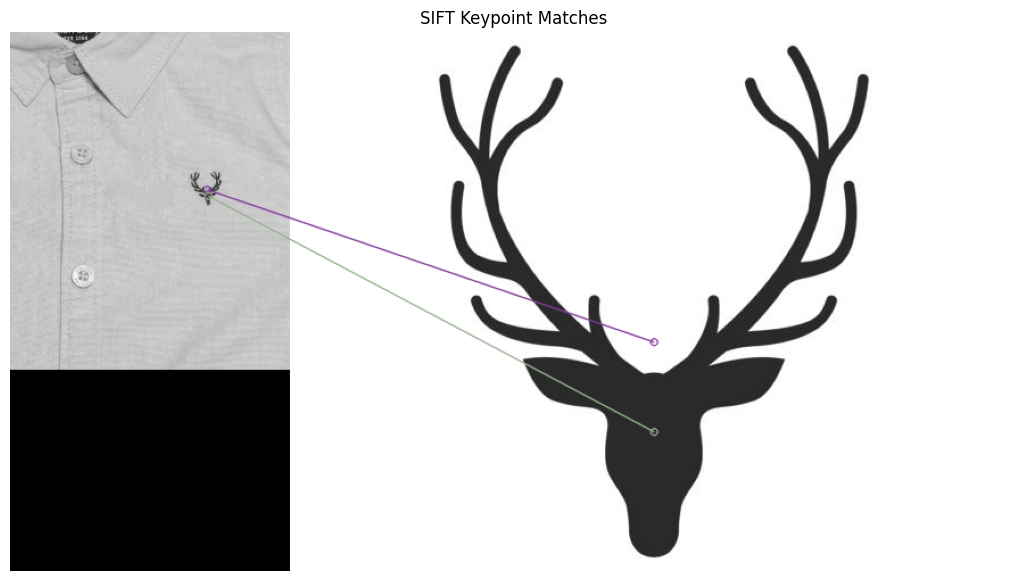

In [19]:
# SIFT Keypoint Detection and Matching

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread(cv2.samples.findFile('ss.png'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(cv2.samples.findFile('SHIRT2.jpg'), cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use Brute-Force matcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

plt.figure(figsize=(15, 7))
plt.imshow(matched_img)
plt.title("SIFT Keypoint Matches")
plt.axis('off')
plt.show()


Inliers after RANSAC: 195 / 297


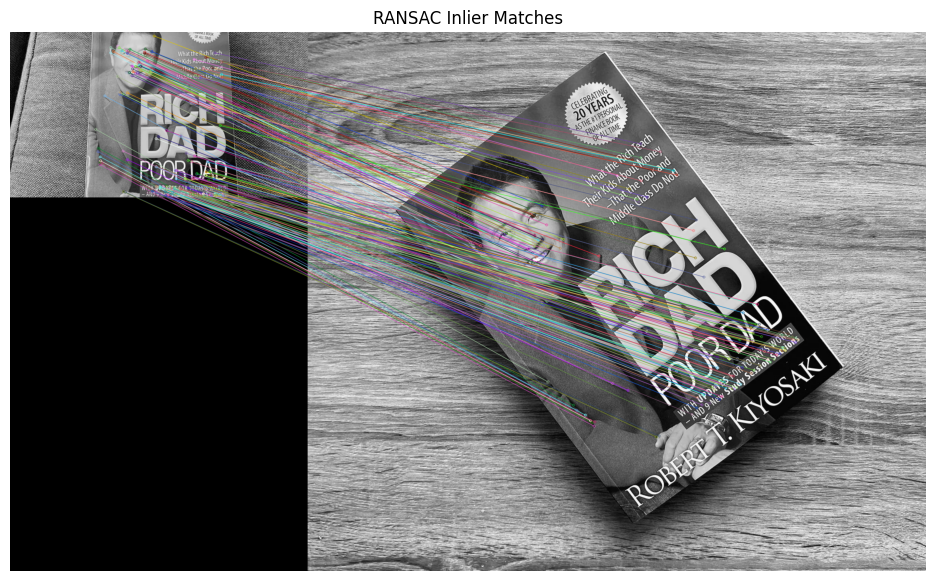

In [17]:
# RANSAC Filtering of Matches and Homography Estimation

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use previously matched keypoints and descriptors (e.g., from SIFT)
img1 = cv2.imread(cv2.samples.findFile('book1.webp'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(cv2.samples.findFile('book2.webp'), cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract matched keypoints
if len(good_matches) >= 4:
    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

    # Compute homography using RANSAC
    H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    # Select inlier matches only
    inliers = [good_matches[i] for i in range(len(good_matches)) if mask[i]]

    print(f"Inliers after RANSAC: {len(inliers)} / {len(good_matches)}")

    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, inliers, None, flags=2)
    plt.figure(figsize=(15, 7))
    plt.imshow(matched_img)
    plt.title("RANSAC Inlier Matches")
    plt.axis('off')
    plt.show()
else:
    print("Not enough matches for RANSAC.")


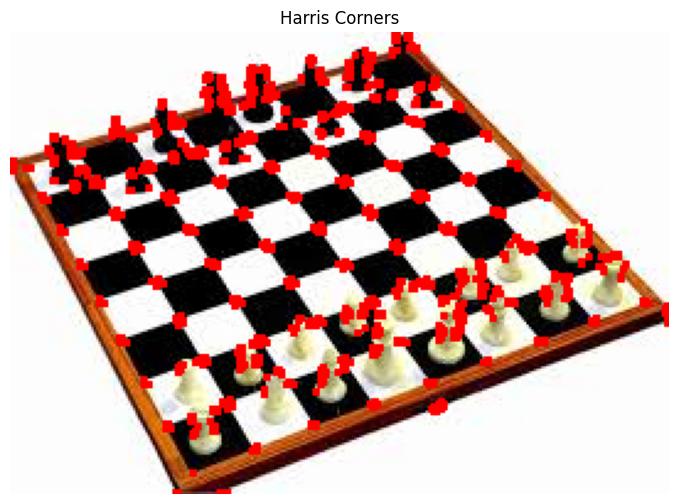

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread(cv2.samples.findFile("chess.jpeg"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Apply Harris corner detector
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners
dst = cv2.dilate(dst, None)

# Threshold to select strong corners
img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark in red

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')
plt.show()
